# Verbinding met SQL

In [6]:
import pyodbc
import pandas as pd

# Database connectiegegevens
DB = {'servername': 'BOOK-CG1LSBSBIK\\SQLEXPRESS', 'database': 'AdventureWorks2019'}
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

# Query om maandelijkse verkoopcijfers op te halen
query = """
SELECT 
    YEAR(OrderDate) AS Year, 
    MONTH(OrderDate) AS Month, 
    SUM(TotalDue) AS MonthlySales
FROM 
    Sales.SalesOrderHeader
GROUP BY 
    YEAR(OrderDate), 
    MONTH(OrderDate)
ORDER BY 
    Year, 
    Month;
"""

# Haal de gegevens op en zet ze in een pandas DataFrame
df = pd.read_sql(query, conn)


C:\Users\prati\AppData\Local\Temp\ipykernel_6308\685701952.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Dataset voorbereiden

In [7]:
# Voeg een seizoensvariabele toe
df['Season'] = df['Month'].apply(lambda x: (x % 12 + 3) // 3) # Winter=1, Spring=2, Summer=3, Fall=4

# Features en target
X = df[['Month', 'Season']]
y = df['MonthlySales']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regressiemodel bouwen

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Lineaire regressie model
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen voor de gehele dataset
y_pred_full = model.predict(X)

# Voorspellingen voor de testset
y_pred_test = model.predict(X_test)

# Evaluatie van het model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Root Mean Squared Error: 2017727.2877241396
Coefficients: [-29157.18151647 218025.24668864]
Intercept: 2891486.6391290203


# Resultaten visualiseren

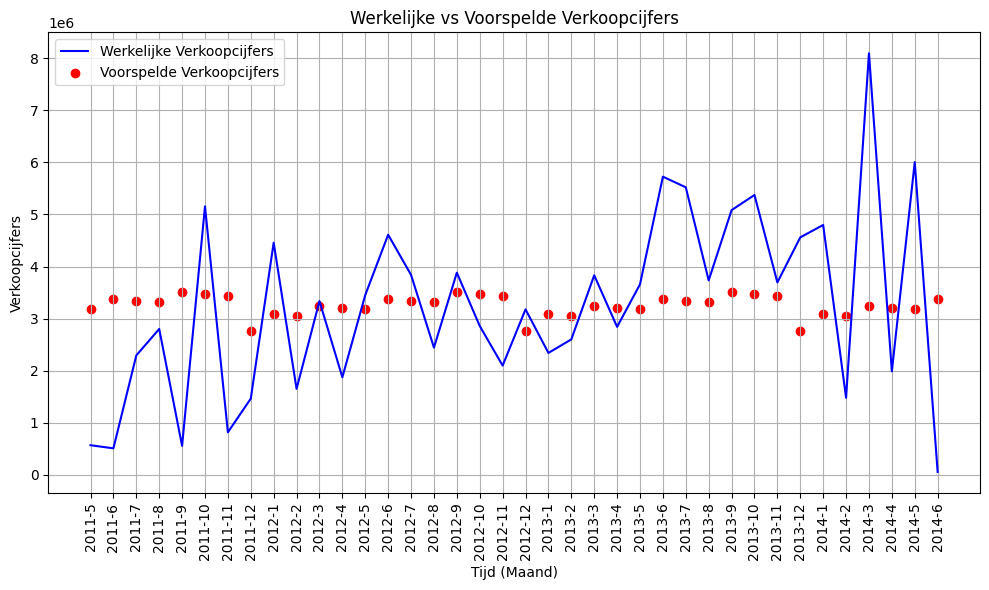

In [9]:
# Visualisatie van de resultaten
plt.figure(figsize=(10, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['MonthlySales'], label='Werkelijke Verkoopcijfers', color='blue')
plt.scatter(df['Year'].astype(str) + '-' + df['Month'].astype(str), y_pred_full, color='red', label='Voorspelde Verkoopcijfers')
plt.xlabel('Tijd (Maand)')
plt.ylabel('Verkoopcijfers')
plt.title('Werkelijke vs Voorspelde Verkoopcijfers')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


# Toekomstige voorspelde Data

C:\Users\prati\AppData\Local\Temp\ipykernel_6308\1657245621.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start='2014-07-01', end='2015-12-31', freq='M')


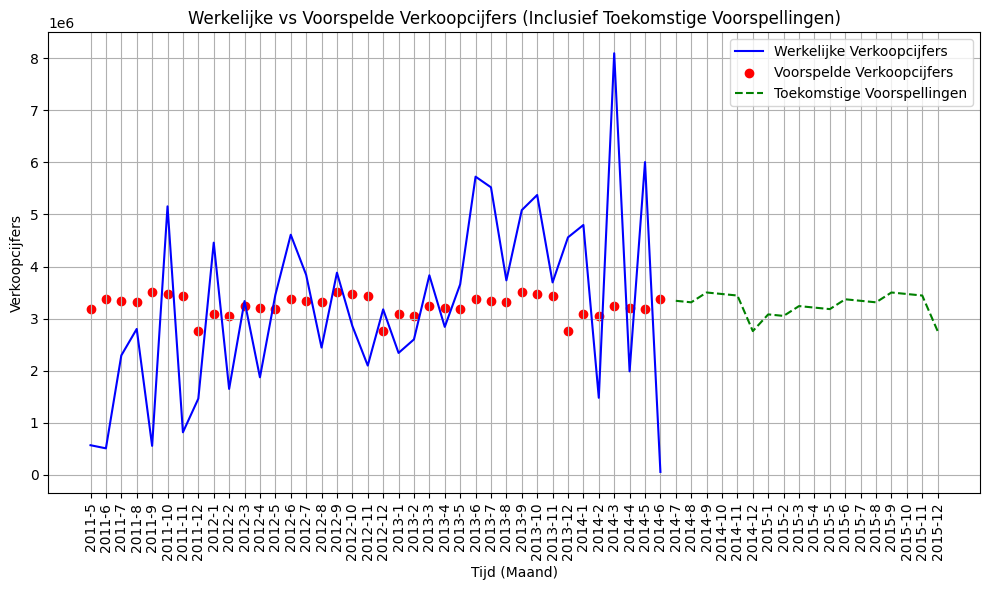

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Stap 1: Genereer toekomstige datapunten
future_months = pd.date_range(start='2014-07-01', end='2015-12-31', freq='M')
future_df = pd.DataFrame({'Year': future_months.year, 'Month': future_months.month})

# Voeg de seizoensvariabele toe aan het toekomstige DataFrame
future_df['Season'] = future_df['Month'].apply(lambda x: (x % 12 + 3) // 3)

# Gebruik dezelfde feature set als het trainingsmodel
X_future = future_df[['Month', 'Season']]

# Stap 2: Voorspellingen doen met het getrainde model
future_df['PredictedSales'] = model.predict(X_future)

# Visualisatie van de resultaten, inclusief toekomstige voorspellingen
plt.figure(figsize=(10, 6))

# Plot werkelijke verkoopcijfers tot en met juni 2014
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['MonthlySales'], label='Werkelijke Verkoopcijfers', color='blue')

# Plot voorspelde verkoopcijfers voor de gehele dataset
plt.scatter(df['Year'].astype(str) + '-' + df['Month'].astype(str), y_pred_full, color='red', label='Voorspelde Verkoopcijfers')

# Plot voorspelde verkoopcijfers voor toekomstige datapunten
plt.plot(future_df['Year'].astype(str) + '-' + future_df['Month'].astype(str), future_df['PredictedSales'], label='Toekomstige Voorspellingen', color='green', linestyle='--')

# Labels en titel toevoegen
plt.xlabel('Tijd (Maand)')
plt.ylabel('Verkoopcijfers')
plt.title('Werkelijke vs Voorspelde Verkoopcijfers (Inclusief Toekomstige Voorspellingen)')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Plot weergeven
plt.show()
